In [9]:
import numpy as np
import scipy.signal
from scipy.optimize import minimize
from datetime import datetime
from fur.one_data_set_analyzer import analyze_one_dataset
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
from sklearn import linear_model
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams.update({'font.size': 16,'legend.fontsize':16})
import seaborn as sns
import sys
import os
from fur.path_assistant import PathAssistant
shift = PathAssistant('shift_03_16_2020',
    ignore_files=['RefCurve_2020-03-16_0_084020_test.Wfm.bin'])
results_dir = shift.get_results_dir()
from fur.extending_with_acnet_data import get_fluctuations_df_with_acnet_data
fluctuations_df = get_fluctuations_df_with_acnet_data(
    shift,
    "res_df_comb_filter_no_nd_filters_ROUND_data_03_16_2020.csv",
    "IOTA_1NL_100MeV_v8.6.1.4.6ds_data.txt"
)
from config import get_from_config
res_df = fluctuations_df


In [10]:
fluctuations_df.describe()

ch2_amplitude  var_of_ch1_amplitude     noise_var    N:IWCMI  \
count      59.000000          5.900000e+01  5.900000e+01  59.000000   
mean        0.477095          3.623416e-08  8.265334e-08  -2.476066   
std         0.151809          1.476278e-08  5.652164e-10   0.806256   
min         0.197326          1.055480e-08  8.193171e-08  -3.717483   
25%         0.362138          2.367362e-08  8.224520e-08  -3.127370   
50%         0.508536          3.888367e-08  8.251995e-08  -2.658120   
75%         0.593619          4.799628e-08  8.303040e-08  -1.853806   
max         0.724421          6.024882e-08  8.425461e-08  -1.008221   

        N:IBEAMA   N:IWCMBE   N:IWCMBR   N:IWCMBF   N:IWCMBG    N:IRFEPA  \
count  59.000000  59.000000  59.000000  59.000000  59.000000   59.000000   
mean   -2.293733  29.088024  31.958560  63.776328  27.560038  357.908036   
std     0.753382   6.224400   7.977613   6.533705   4.256681    3.950466   
min    -3.537660  24.160151  26.515418  56.008041  23.512749  330.412647   
25%    -2.865415  26.392976  28.700439  60.187258  25.540487  358.021143   
50%    -2.444415  27.638998  29.754167  63.147003  26.799048  358.675957   
75%    -1.708575  28.365132  30.420897  64.896234  27.557868  358.953024   
max    -0.934441  57.706032  66.060364  94.527225  48.898190  359.607635   

        N:ITC1RSH   N:ITC2RSH   N:ITC3RSH  N:ITC4RSH   N:ITC4LSH    N:ITC3LSH  \
count   59.000000   59.000000   59.000000     59.000   59.000000    59.000000   
mean   186.107561  551.040634  740.805292    732.771  445.330400   762.718343   
std     10.099529   27.797197   54.148953      0.000   26.155271    61.046892   
min    166.199505  486.372540  655.627990    732.771  391.067150   672.235015   
25%    176.983605  527.498753  710.401003    732.771  429.468300   728.782225   
50%    188.457550  559.892975  742.303040    732.771  453.962710   761.620000   
75%    194.396550  574.447510  760.584505    732.771  464.444245   781.754520   
max    200.315900  587.432980  959.049010    732.771  508.561000  1022.552000   

        N:ITC2LSH   N:ITC1LSH   N:ITC1RSV   N:ITC2RSV   N:ITC3RSV  \
count   59.000000   59.000000   59.000000   59.000000   59.000000   
mean   588.938010  189.071923  415.957821  167.755264  252.824918   
std     30.425820    9.483535   25.741831    9.131591   14.639130   
min    515.228015  166.316955  367.143465  149.420500  223.069000   
25%    562.894973  180.956977  392.781180  159.756895  240.112450   
50%    598.031005  192.078255  423.156890  170.386850  256.593140   
75%    613.508025  196.742827  437.170517  175.376045  264.781547   
max    629.105500  201.637450  451.746700  180.842805  272.702945   

          N:ITC4RSV   N:ITC4LSV   N:ITC3LSV   N:ITC2LSV   N:ITC1LSV  \
count  5.900000e+01   59.000000   59.000000   59.000000   59.000000   
mean   1.059989e+02  496.266982  249.758923  167.135073  505.376271   
std    1.433284e-14   26.344451   16.159093    9.362717   32.031415   
min    1.059989e+02  446.642655  216.393690  148.852000  443.298490   
25%    1.059989e+02  472.290725  235.620000  158.861303  476.439353   
50%    1.059989e+02  504.392485  254.283005  170.157410  516.040040   
75%    1.059989e+02  517.858262  262.921898  174.997955  532.071505   
max    1.059989e+02  532.679505  271.820250  180.810205  551.466490   

       N:IWCMI_recalibrated_to_IWCMI_absolute  \
count                               59.000000   
mean                                -2.190240   
std                                  0.713186   
min                                 -3.288353   
25%                                 -2.766360   
50%                                 -2.351278   
75%                                 -1.639811   
max                                 -0.891836   

       N:IBEAM_recalibrated_to_IWCMI_absolute  Sigma_um_X  Sigma_um_X_err  \
count                               59.000000   59.000000       59.000000   
mean                                -2.217436  523.121792        5.434249   
std              

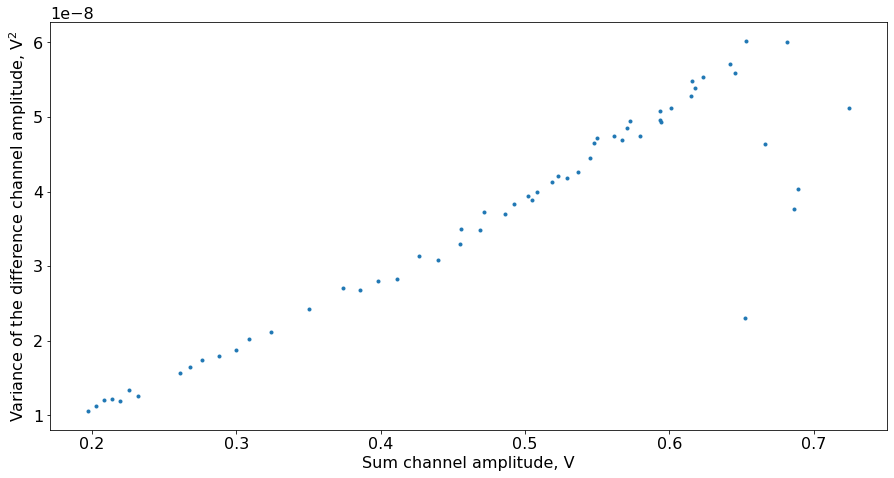

In [11]:
plt.plot(res_df["ch2_amplitude"],res_df["var_of_ch1_amplitude"] ,'.')
plt.xlabel("Sum channel amplitude, V")
plt.ylabel("Variance of the difference channel amplitude, V$^2$")
plt.show()

In [12]:
alpha = 1.6e-19/2e-12*np.sqrt(2)/4
alpha

2.8284271247461904e-08

In [13]:
reg = linear_model.LinearRegression(fit_intercept=False)
x1 = np.insert(res_df["ch2_amplitude"].values,0,0)
x2 = x1**2
y = np.insert(res_df["var_of_ch1_amplitude"].values,0,0)-alpha*x1
reg.fit(x2.reshape((len(x2), 1)), y)
a = reg.coef_[0]
Mf = np.sqrt(2)/(4*a)
Mf

4152178.85859722

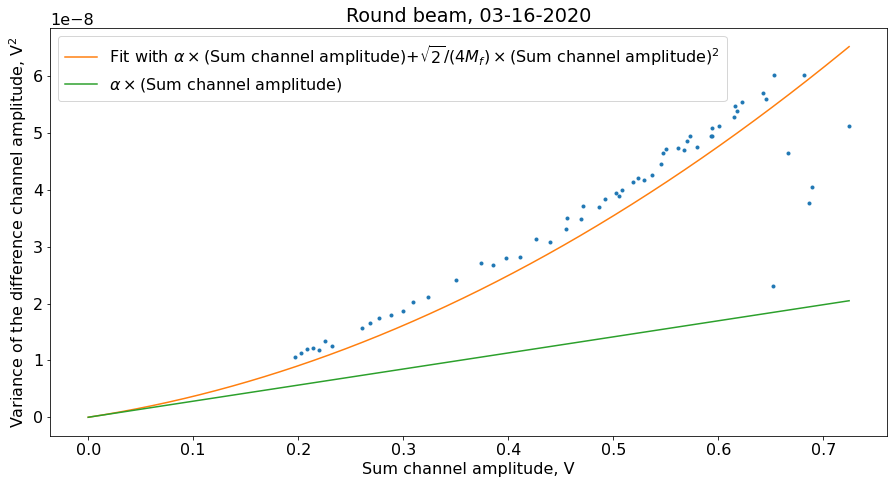

In [14]:
plt.plot(res_df["ch2_amplitude"],res_df["var_of_ch1_amplitude"] ,'.')
x_f = np.linspace(0,max(x1),1000)
plt.plot(x_f, alpha*x_f+a*x_f**2, label=r"Fit with $\alpha\times$(Sum channel amplitude)+$\sqrt{2}/(4M_f)\times$(Sum channel amplitude)$^2$")
plt.plot(x_f, alpha*x_f, label=r"$\alpha\times$(Sum channel amplitude)")
plt.xlabel("Sum channel amplitude, V")
plt.ylabel("Variance of the difference channel amplitude, V$^2$")
plt.title(r"Round beam, 03-16-2020")
plt.legend()
plt.savefig(results_dir.fi("comb_filter_no_nd_filters_ROUND_data_03_16_2020.pdf"), bbox_inches='tight')
plt.show()

$\alpha=\frac{\sqrt{2}e}{4 C_f}$,
it is the predicted slope for the quantum Poisson contribution. - This estimation doesn't take into account attenuation and dispersion in the cable yet. When they are taken into account the agreement might get even better.
$M_f$ is the numer of coherent modes, according to the least squares fit.

$M_f = 4.1\times 10^6$

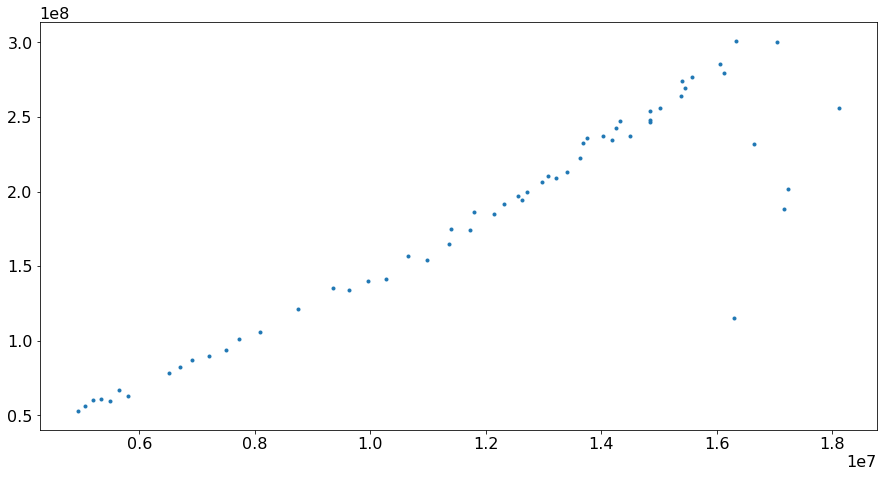

In [15]:
varN = 1/alpha**2*4*res_df["var_of_ch1_amplitude"].values
N = 1/alpha/np.sqrt(2)*res_df["ch2_amplitude"].values
plt.plot(N,varN,'.')
plt.show()

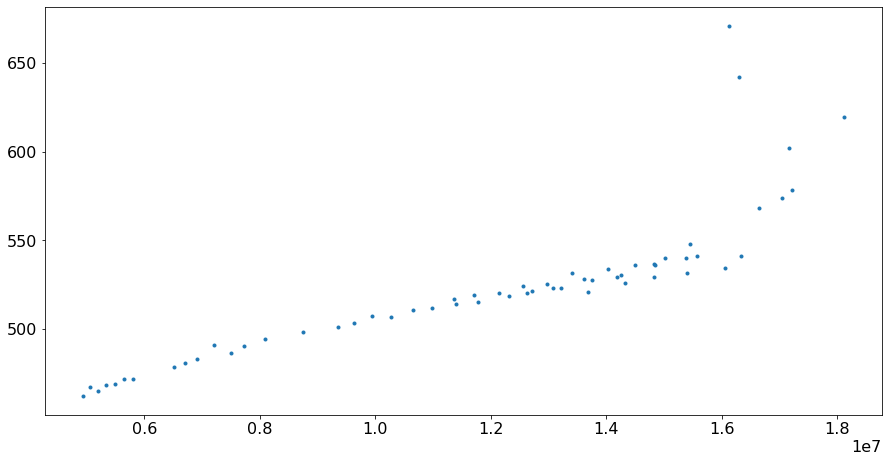

In [16]:
plt.plot(N,fluctuations_df["Sigma_um_X"],'.')
plt.show()

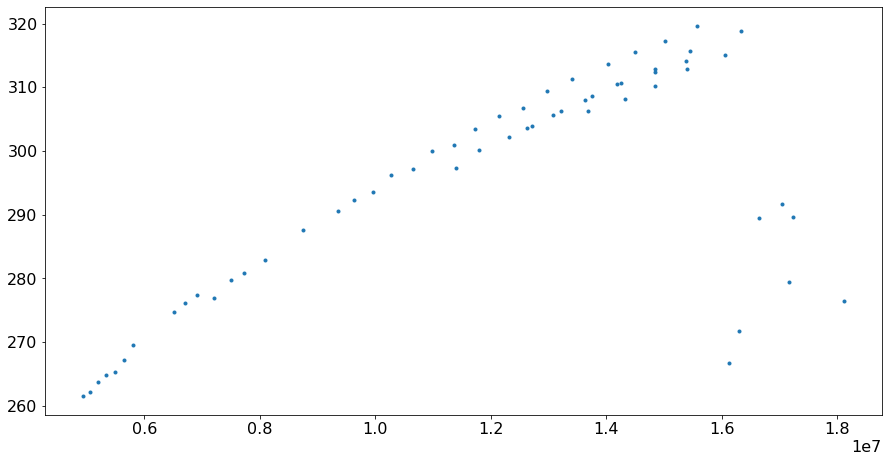

In [17]:
plt.plot(N,fluctuations_df["Sigma_um_Y"],'.')
plt.show()